### Project begins

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.loadtxt('data_total.txt')
print(data.shape)

(8400, 2500)


In [2]:
Y = np.zeros([7*12*100,1])
ct2 = 0
for ii in range(1,8):
    for jj in range(1,13):
        for kk in range(1,101):
            Y[ct2] = int(ii)
            ct2 += 1

In [3]:
X = data/250.0
y = Y.ravel()
print(X.shape)
print(y.shape)

(8400, 2500)
(8400,)


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### pca elbow plot

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
explained_variances = []
dimensions = [i for i in range(1,400,2)]

for d in dimensions:
    pca = PCA(n_components=d)
    pca.fit(X_scaled)
    X_pca = pca.transform(X_scaled)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)

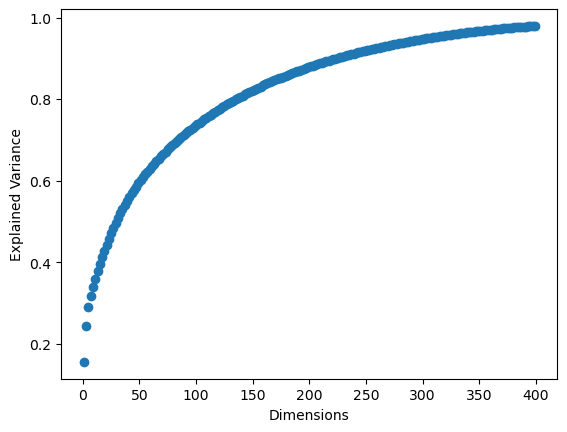

In [7]:
plt.scatter(dimensions, explained_variances)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
# plt.savefig('pca_elbow.png',dpi=300)
plt.show()

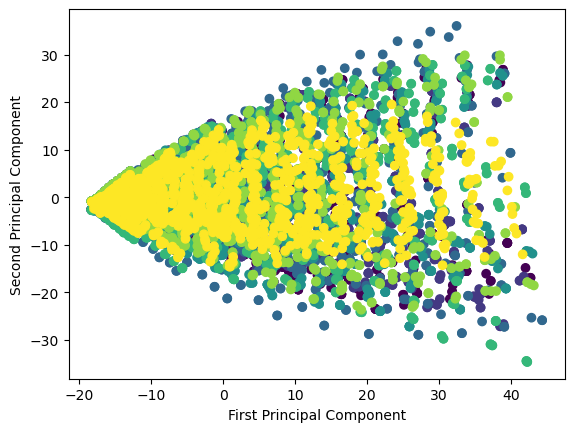

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=400)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
# plt.savefig('pca.png',dpi=300)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

### determine C for linear SVM

In [6]:
from sklearn.svm import SVC

In [7]:
C_linr = [i for i in range(1,100,2)]
accuracy_c_linr = []

for c in C_linr:
    svm = SVC(kernel='linear', C=c)
    svm.fit(X_train, y_train)
    y_pred_c = svm.predict(X_test)
    dummyaccuracy = svm.score(X_test, y_test)
    accuracy_c_linr.append(dummyaccuracy)

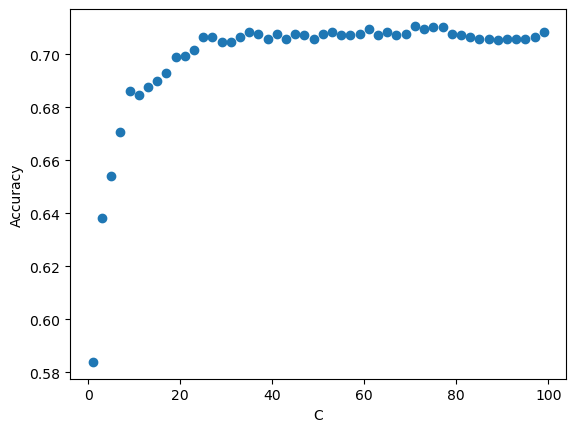

In [8]:
plt.scatter(C_linr, accuracy_c_linr)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.savefig('svm_tune_c_linr.png',dpi=300)
plt.show()

### linear SVM with determined C

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

svm = SVC(kernel='linear', C=30)

svm.fit(X_train, y_train)

SVC(C=30, kernel='linear')

In [10]:
# Evaluation of the SVM classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_linr = svm.score(X_test, y_test)
y_pred_linr = svm.predict(X_test)
precision_linr = precision_score(y_test, y_pred_linr, average='weighted')
recall_linr = recall_score(y_test, y_pred_linr, average='weighted')

print(f"Accuracy: {accuracy_linr:.2f}")
print(f"Precision: {precision_linr:.2f}")
print(f"Recall: {recall_linr:.2f}")

Accuracy: 0.71
Precision: 0.70
Recall: 0.71


Classification report:
              precision    recall  f1-score   support

         1.0       0.65      0.75      0.70       247
         2.0       0.70      0.83      0.76       233
         3.0       0.71      0.67      0.69       248
         4.0       0.71      0.74      0.72       242
         5.0       0.83      0.89      0.86       245
         6.0       0.72      0.62      0.67       250
         7.0       0.58      0.40      0.48       215

    accuracy                           0.71      1680
   macro avg       0.70      0.70      0.70      1680
weighted avg       0.70      0.71      0.70      1680



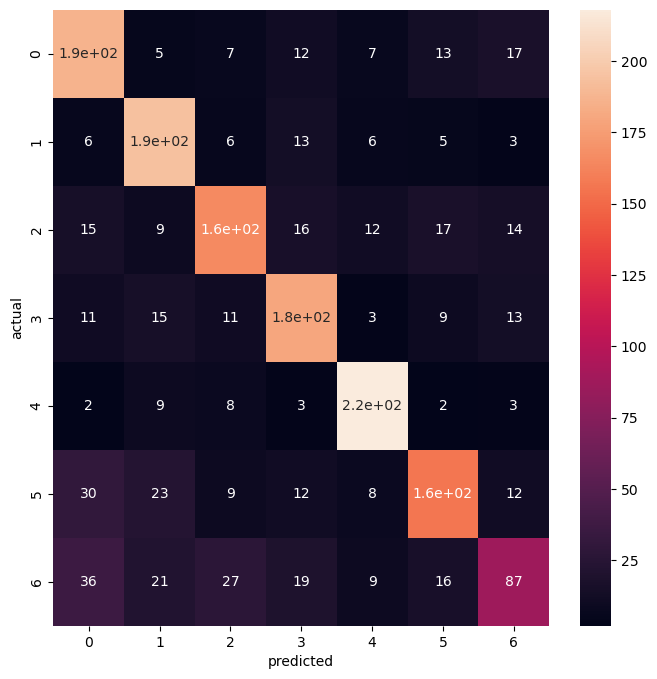

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(8,8))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_linr) 

ax = sns.heatmap(cm, annot=True) 
ax.set_xlabel('predicted') 
ax.set_ylabel('actual')
print("Classification report:")
print(classification_report(y_test, y_pred_linr))
plt.savefig('svm_lin_analysis.png',dpi=300)

### determine C for nonlinear SVM

In [13]:
from sklearn.svm import SVC

In [14]:
C = [i for i in range(1,100,2)]
accuracy_c = []

for c in C:
    svm = SVC(kernel='rbf', C=c, gamma='auto')
    svm.fit(X_train, y_train)
    y_pred_c = svm.predict(X_test)
    dummyaccuracy = svm.score(X_test, y_test)
    accuracy_c.append(dummyaccuracy)

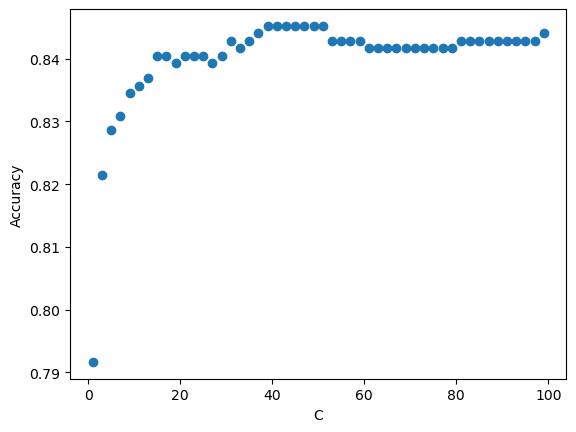

In [15]:
plt.scatter(C, accuracy_c)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.savefig('svm_tune_c.png',dpi=300)
plt.show()

In [16]:
svm = SVC(kernel='rbf', C=40, gamma='auto')

svm.fit(X_train, y_train)

SVC(C=40, gamma='auto')

In [17]:
# Evaluation of the SVM classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_rbf = svm.score(X_test, y_test)
y_pred_rbf = svm.predict(X_test)
precision_rbf = precision_score(y_test, y_pred_rbf, average='weighted')
recall_rbf = recall_score(y_test, y_pred_rbf, average='weighted')

print(accuracy_score(y_test,y_pred_rbf))
print(f"Accuracy: {accuracy_rbf:.2f}")
print(f"Precision: {precision_rbf:.2f}")
print(f"Recall: {recall_rbf:.2f}")

0.4232142857142857
Accuracy: 0.42
Precision: 0.44
Recall: 0.42


Classification report:
              precision    recall  f1-score   support

         1.0       0.83      0.79      0.81       129
         2.0       0.95      0.92      0.94       102
         3.0       0.89      0.75      0.81       113
         4.0       0.94      0.82      0.87       127
         5.0       0.90      0.94      0.92       130
         6.0       0.83      0.87      0.85       126
         7.0       0.65      0.83      0.73       113

    accuracy                           0.85       840
   macro avg       0.86      0.85      0.85       840
weighted avg       0.86      0.85      0.85       840



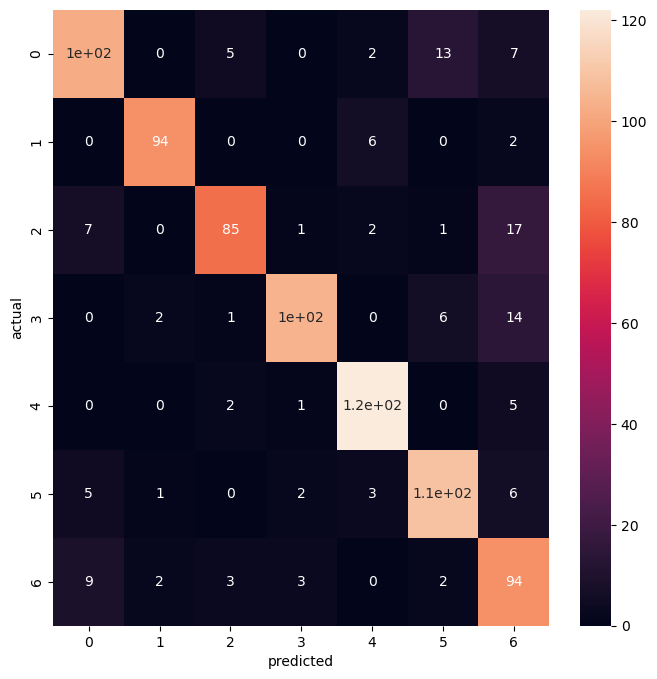

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(8,8))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_rbf) 

ax = sns.heatmap(cm, annot=True) 
ax.set_xlabel('predicted') 
ax.set_ylabel('actual')
print("Classification report:")
print(classification_report(y_test, y_pred_rbf))
plt.savefig('svm_rbf.png',dpi=300)